# Skyproj Base Class

In this section we introduce `skyproj.Skyproj` base class and several of its features.

In [1]:
# Set interactive plots
%matplotlib notebook

# Import matplotlib
import matplotlib.pyplot as plt

# Import skyproj
import skyproj

# Reset any matplotlib parameters to defaults for testing
plt.rcParams.update(plt.rcParamsDefault)

`skyproj` is an interface linking `matplotlib` with [PROJ](https://proj.org/) to create good looking and interactive visualizations of astronomical map data.  It has its origins in `cartosky`, which was built on `cartopy` and some of the features may be familiar to users of `cartopy`.  However, it has diverged significantly as the needs of mapping the sky are somewhat different than the needs of mapping the Earth.
The default projection for a `skyproj.Skyproj()` is the [Plate carrée](https://en.wikipedia.org/wiki/Equirectangular_projection) (literally "flat square") or equirectangular projection.  This projection maps longitude (right ascension) and latitude (declination) directly onto a grid.  It is neither conformal (angle preserving) or equal area, so is not particularly recommended for plotting astronomical data.

We will start by making a default sky projection (`Skyproj`) and plotting a few points on it.  The defaults for all `skyproj.Skyproj` projections include the following:
* Celestial orientation (right ascension increases to the left).
* Projection is centered at 0 longitude.
* Gridlines are on.
* Longitude tick labels are all positive (RA from 0 to 360, rather than -180 to 180).
* Full sky projection.
* The cartosky plot axes will replace the current axis (via `plt.gca()`) unless a specific axis is specified.

In interactive mode, the `skyproj.Skyproj` objects are zoomable, and later we will see when plotting healpix or healsparse maps they can dynamically adjust the plotting resolution.

<IPython.core.display.Javascript object>


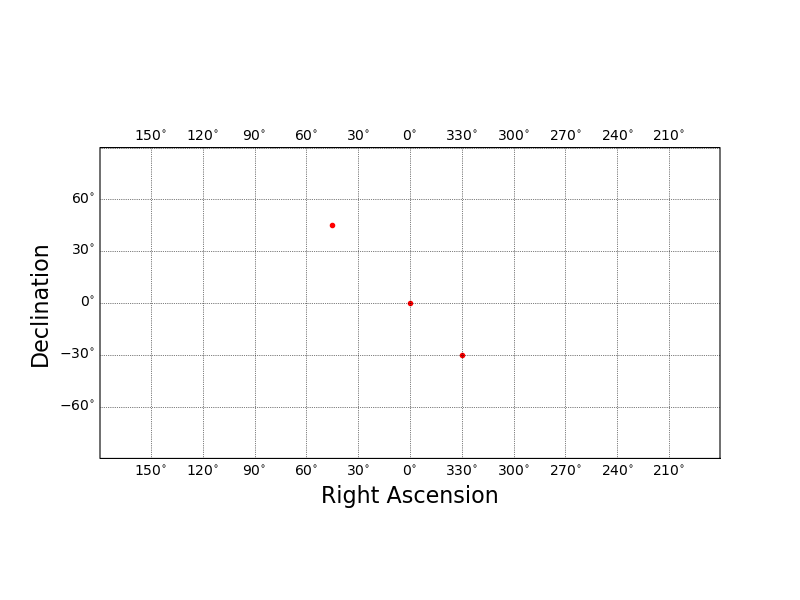

In [2]:
# We can start with a simple Plate carée (``cyl``) projection.
# Try zooming the figure!
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)
sp = skyproj.Skyproj(ax=ax)
sp.plot([0, 45, -30], [0, 45, -30], 'r.')
plt.show()

That is not a particularly exciting projection, of course.  There are a number of projections that are supported by `skyproj` via `proj`.  The ones nominally supported by `skyproj` can be retrieved with the following command:

In [3]:
skyproj.get_available_crs()

{'hammer': 'Hammer',
 'mbtfpq': 'McBryde-Thomas Flat Polar Quartic',
 'cyl': 'Plate Carree',
 'eqearth': 'Equal Earth',
 'laea': 'Lambert Azimuthal Equal Area',
 'moll': 'Mollweide',
 'obmoll': 'Oblique Mollweide',
 'gnom': 'Gnomonic'}

Any [projection supported by `proj`](https://proj.org/operations/projections/index.html) could in theory be used.  All of the projections regularly tested and known to be supported have dedicated subclasses (that are simply thin wrappers around the projection names):
* Plate carée (`cyl`), used in `skyproj.Skyproj`.
* McBryde-Thomas Flat Polar Quartic (`mbtfpq`), used in the `skyproj.McBrydeSkyproj`.
* Hammer-Aitoff (`hammer`), used in the `skyproj.HammerSkyproj`.
* Mollweide (`moll`), used in the `skyproj.MollweideSkyproj`.
* Equal Earth (`eqearth`), used in the `skyproj.EqualEarthSkyproj`.
* Lambert Azimuthal Equal Area (`laea`), used in the `skyproj.LaeaSkyproj`.  This is suitable for polar regions, and cannot project the full sky.

<IPython.core.display.Javascript object>


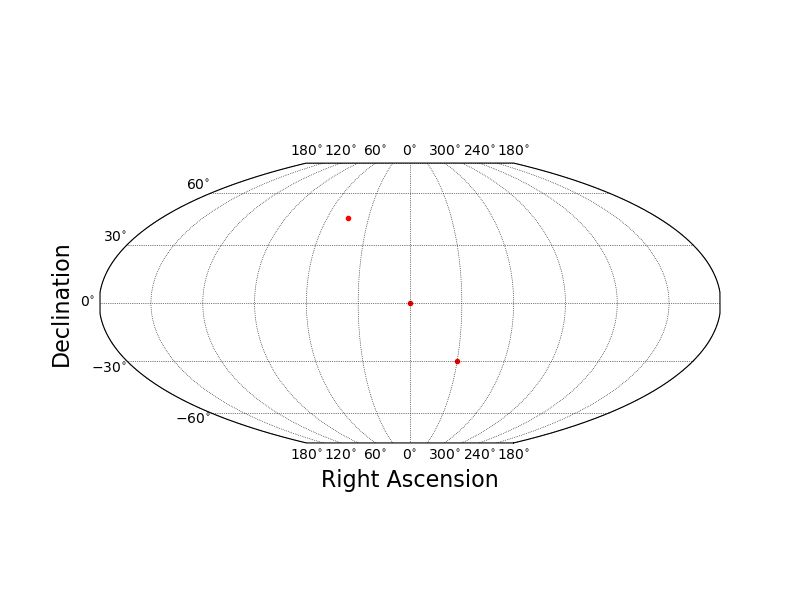

In [4]:
# Let's look at the McBryde-Thomas Flat Polar Quartic projection.
# This is also zoomable!
fig = plt.figure(2, figsize=(8, 6))
fig.clf()
ax = fig.add_subplot(111)
sp = skyproj.McBrydeSkyproj(ax=ax)
# Could also use skyproj.Skyproj(ax=ax, projection_name='mbtfpq')
sp.plot([0, 45, -30], [0, 45, -30], 'r.')
plt.show()

If you know you don't want to project the full sky, you can specify the extent via the extent keyword, in the order `[lon_min, lon_max, lat_min, lat_max]`.
We will also look at how to draw a simple polygon.  All points are connected via geodesics (great circles).

<IPython.core.display.Javascript object>


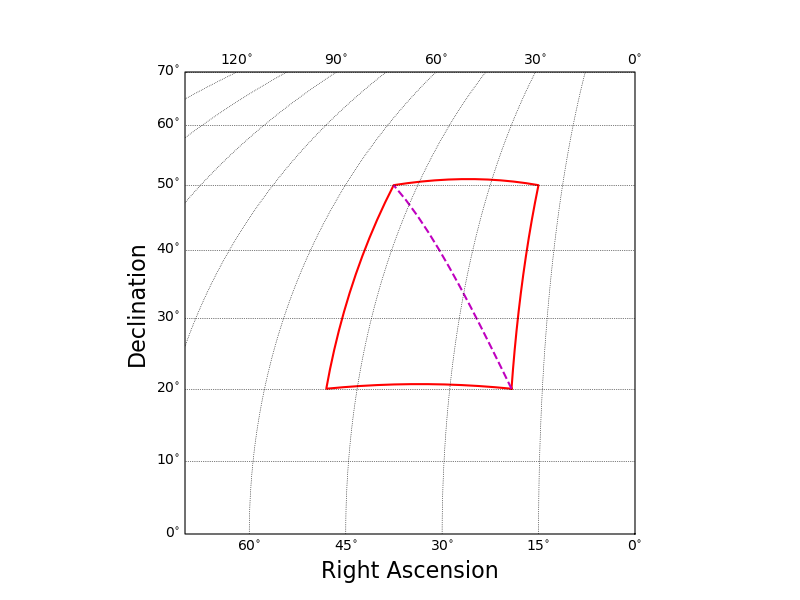

In [5]:
fig = plt.figure(3, figsize=(8, 6))
fig.clf()
ax = fig.add_subplot(111)
sp = skyproj.McBrydeSkyproj(ax=ax, extent=[0, 70, 0, 70])
sp.draw_polygon([20, 50, 50, 20], [20, 20, 50, 50])
# All paths plotted with plot in lon/lat space are plotted as geodesics
sp.plot([20, 50], [20, 50], 'm--')
plt.show()

When only imaging a small region of the sky (as above) you can get less distortion by adjusting the projection central longitude.  Note that while the map extent can be changed on-the-fly with zooming (or `set_extent`), the projection central longitude is fixed when the `skyproj.Skyproj` is instantiated.

<IPython.core.display.Javascript object>


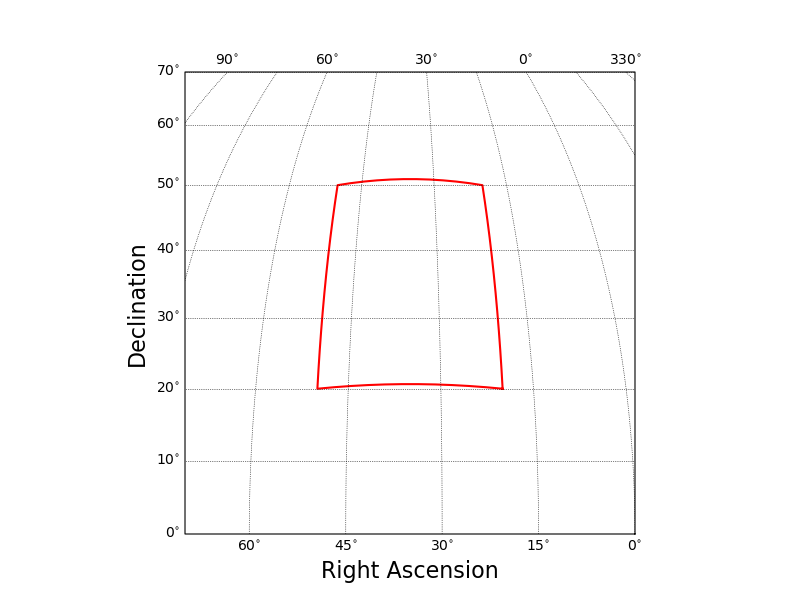

In [6]:
fig = plt.figure(4, figsize=(8, 6))
fig.clf()
ax = fig.add_subplot(111)
sp = skyproj.McBrydeSkyproj(ax=ax, extent=[0, 70, 0, 70], lon_0=35)
sp.draw_polygon([20, 50, 50, 20], [20, 20, 50, 50])
plt.show()